chi2ndf =0.219005


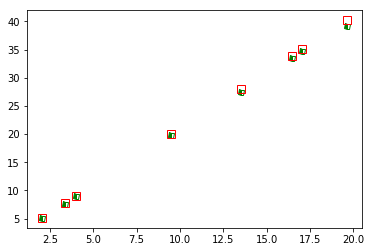

In [21]:
# based on http://pytorch.org/tutorials/beginner/pytorch_with_examples.html#warm-up-numpy
# same with ex3.ipynb but with H=5 hidden layers and same number of epochs = 50000
# -*- coding: utf-8 -*-
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

torch.manual_seed(12)


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 8, 1, 5, 1
epochs = 50000

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
#x = Variable(torch.Tensor(N,1).uniform_(1,20), requires_grad=False) # input values
#y = Variable(torch.randn(N, D_out), requires_grad=False)

x = Variable(torch.randn(N, D_in).uniform_(1,20), requires_grad=False)
a, b, c  = 0, 2, 1
y = a*x**2 + b*x + c # target values

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(size_average=False)
#loss_fn = torch.nn.MSELoss(size_average=False, reduce=False)


learning_rate = 1e-4
for t in range(epochs):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y)
    #print(t, loss.data[0])

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data


print ("chi2ndf =%f"%(loss_fn(model(x), y).data[0]/N))
plt.subplots()
plt.plot(x.data.numpy(), model(x).data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x.data.numpy(), y.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.show()